# Seaborn Tutorial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [5]:
print(sns.get_dataset_names())
crash_df = sns.load_dataset('car_crashes')

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


## Distribution Plot

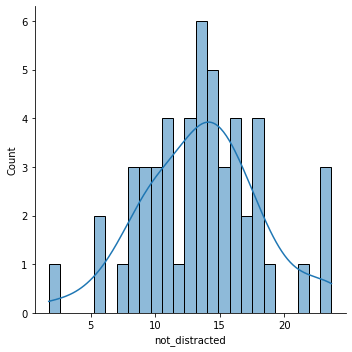

In [14]:
sns.displot(crash_df['not_distracted'], kde=True, bins=25)

## Joint plot

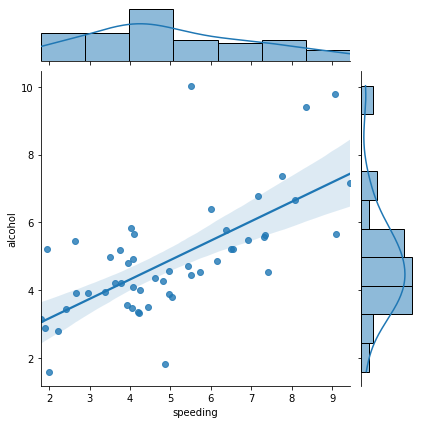

In [18]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

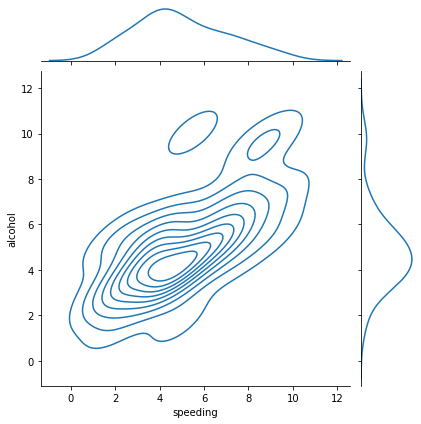

In [19]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='kde')

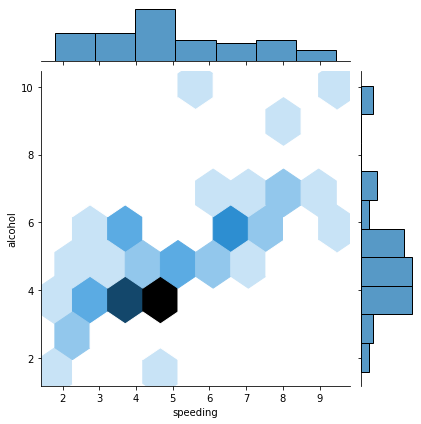

In [20]:
sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='hex')

## KDE plot

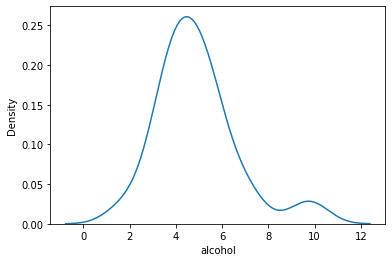

In [21]:
sns.kdeplot(crash_df['alcohol'])

## Pair plots

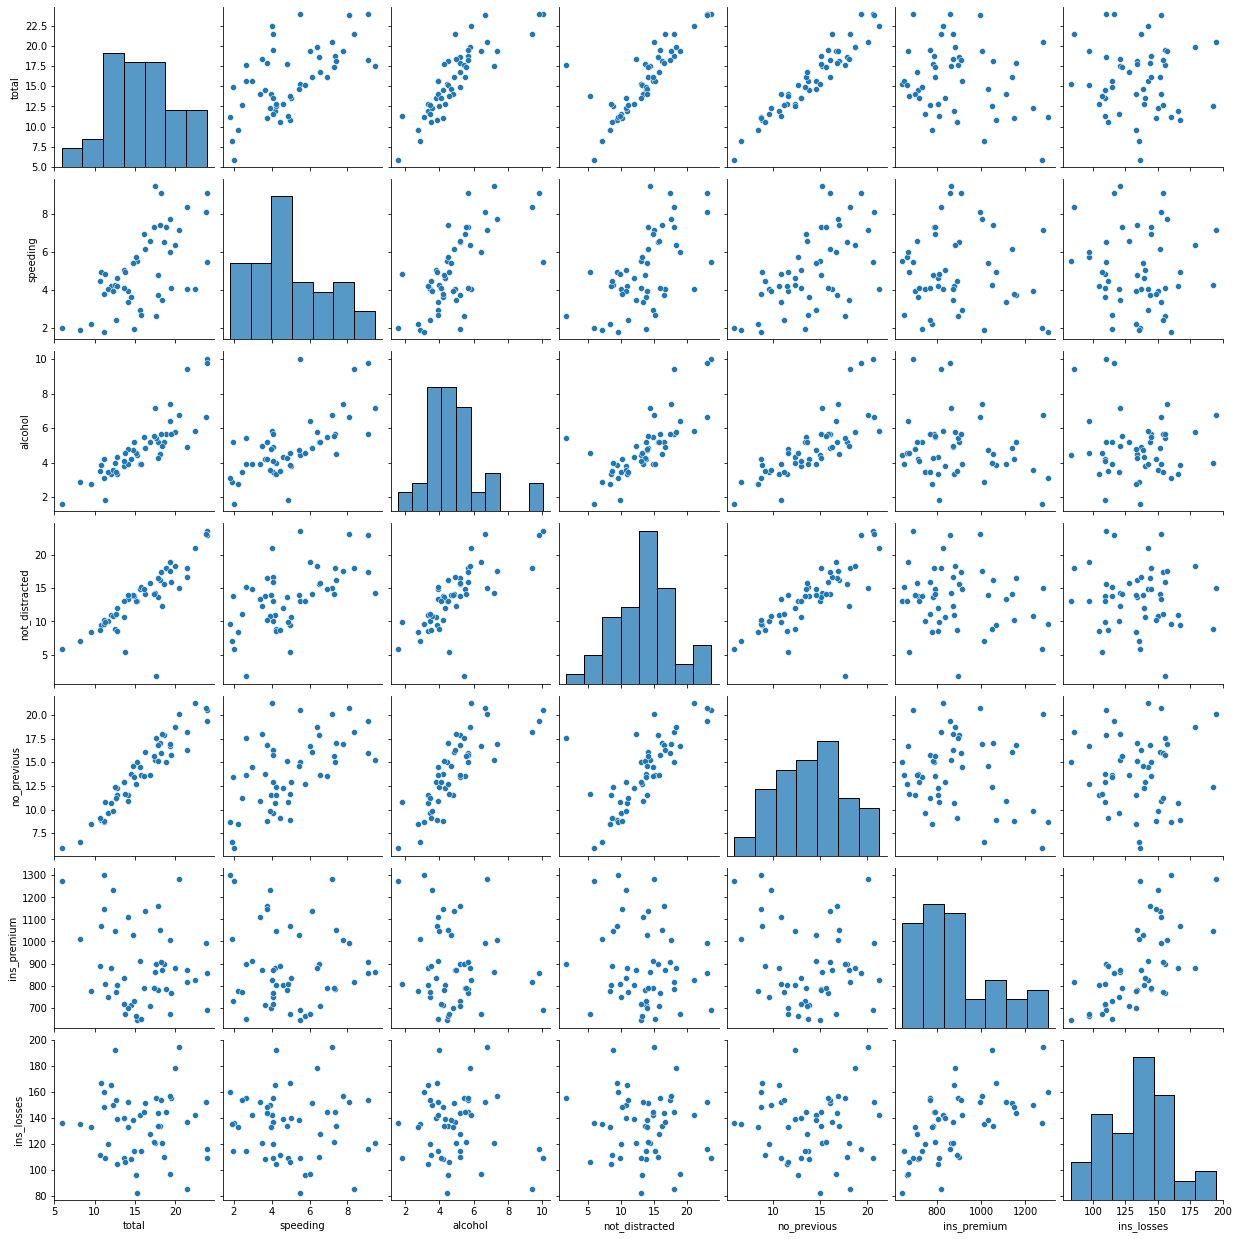

In [22]:
sns.pairplot(crash_df)

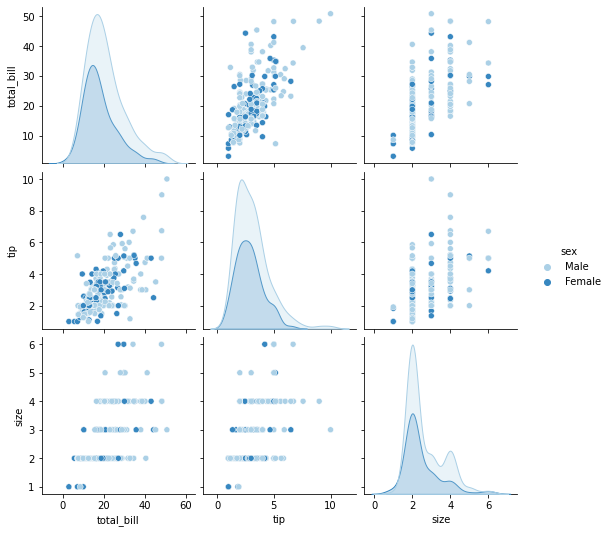

In [24]:
tips_df = sns.load_dataset('tips')
sns.pairplot(tips_df, hue='sex', palette='Blues')

## Rug plot

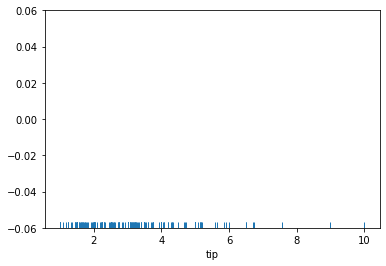

In [26]:
# denser when data is most common
sns.rugplot(tips_df['tip'])

## Styling

<Figure size 1152x576 with 0 Axes>

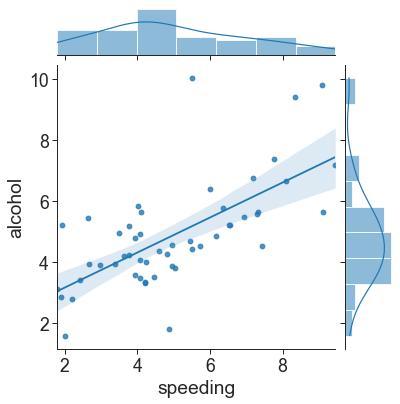

In [49]:
sns.set_style('ticks') # dark, white, whitegrid, darkgrid, ticks

plt.figure(figsize=(16,8))

sns.set_context('paper', font_scale=2)

sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg')

# sns.despine(left=True, bottom=True)

## Categorical Plots

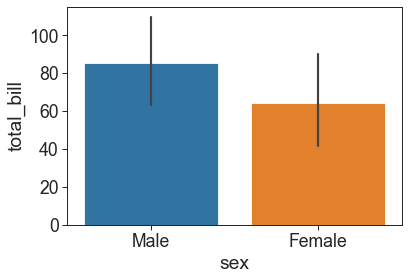

In [55]:
sns.barplot(x='sex', y='total_bill', data=tips_df, estimator=np.cov)

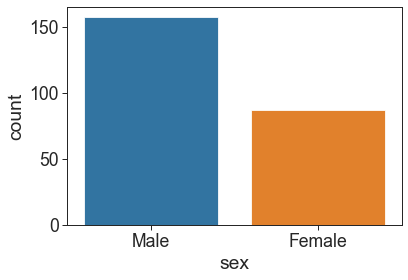

In [56]:
sns.countplot(x='sex', data=tips_df)

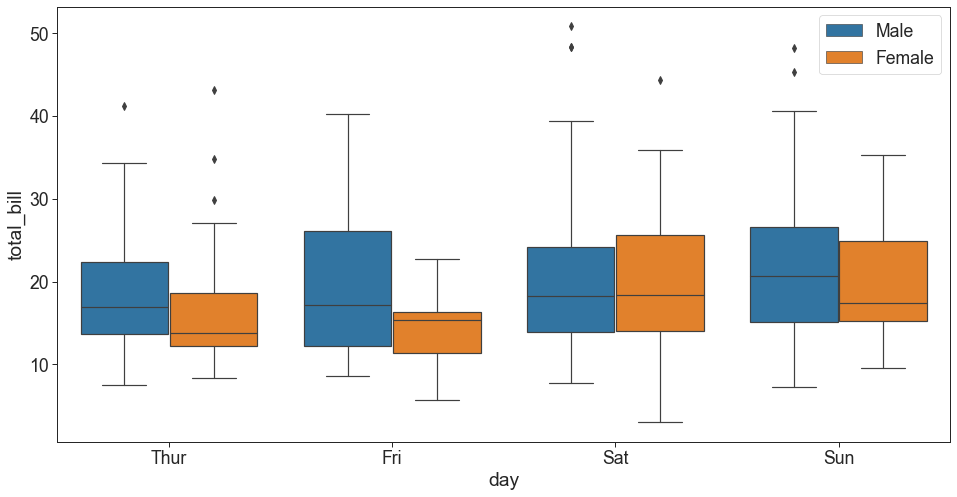

In [60]:
plt.figure(figsize=(16,8))
sns.boxplot(x='day', y='total_bill', data=tips_df, hue='sex')
plt.legend(loc=0)

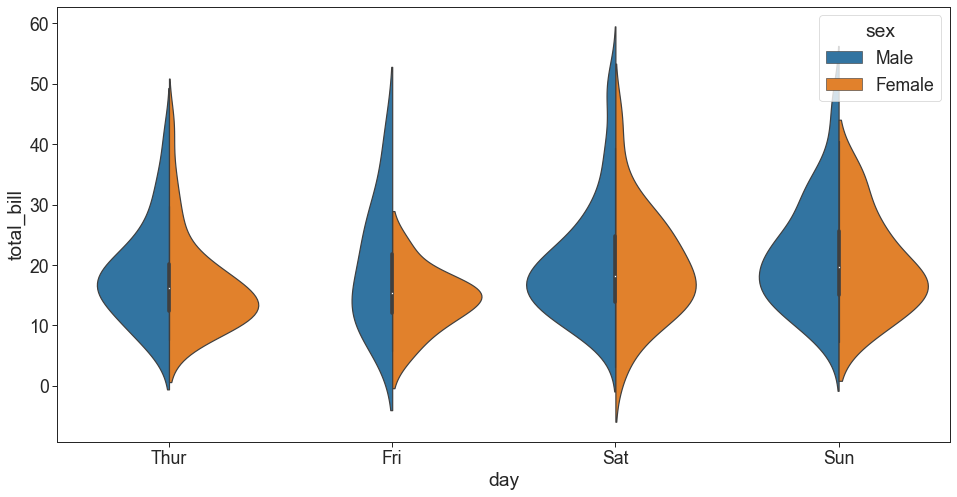

In [63]:
plt.figure(figsize=(16,8))
sns.violinplot(x='day', y='total_bill', data=tips_df, hue='sex', split=True)

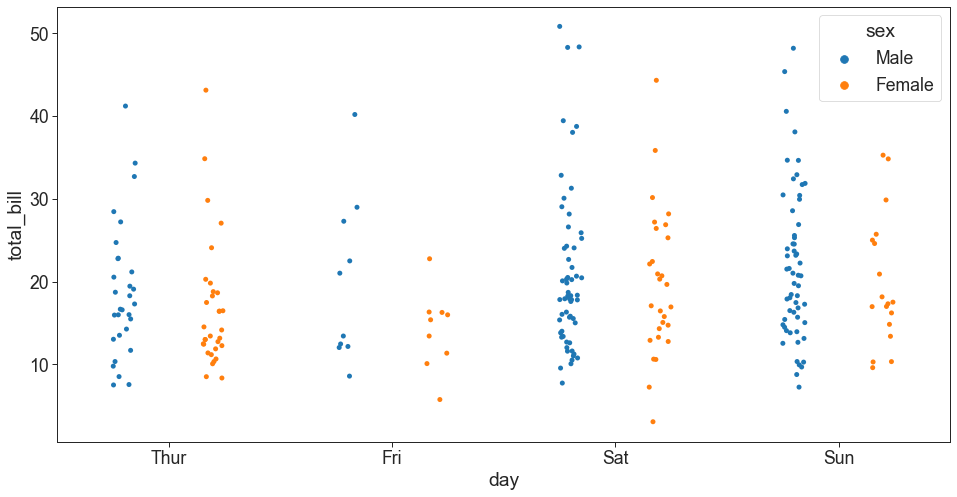

In [69]:
plt.figure(figsize=(16,8))
sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, hue='sex', dodge=True)

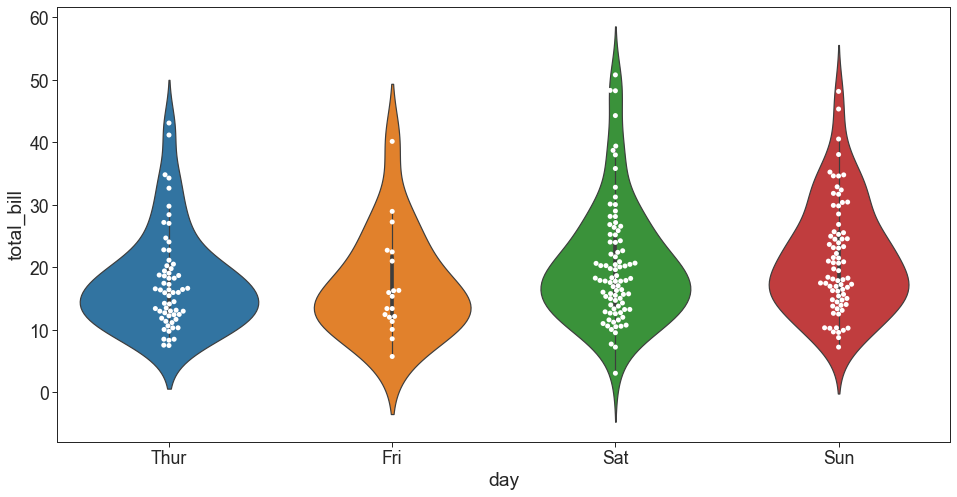

In [73]:
plt.figure(figsize=(16,8))
sns.violinplot(x='day', y='total_bill', data=tips_df)
sns.swarmplot(x='day', y='total_bill', data=tips_df, color='white')

## Palettes

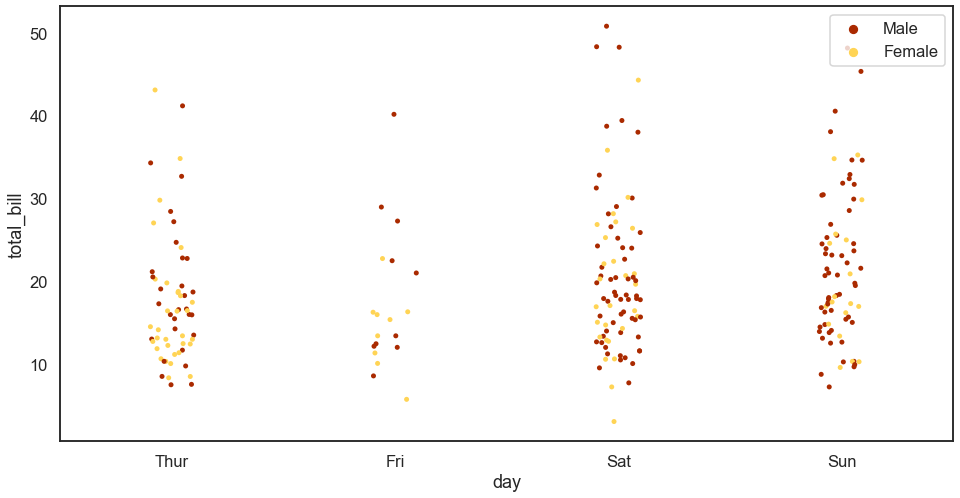

In [80]:
plt.figure(figsize=(16,8))
sns.set_style('white')
sns.set_context('talk')
sns.stripplot(x='day', y='total_bill', data=tips_df, hue='sex', palette='afmhot')
plt.legend(loc=1)

## Matrix plots

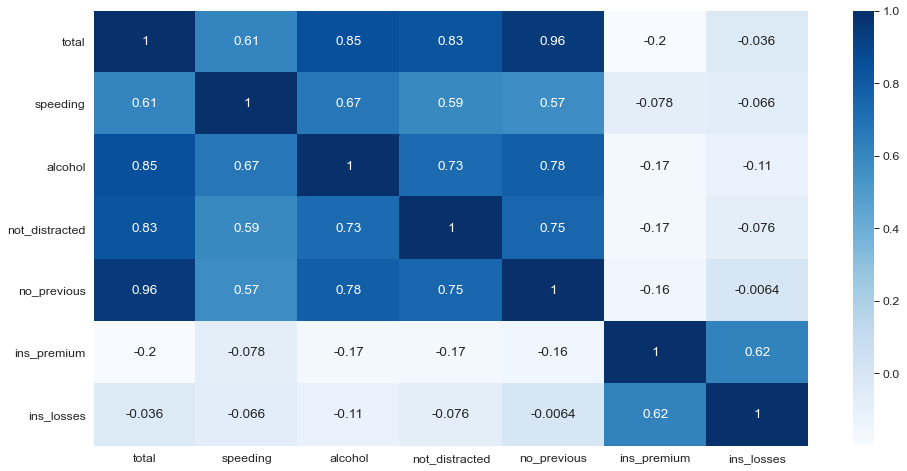

In [87]:
plt.figure(figsize=(16,8))
sns.set_context('paper', font_scale=1.4)

crash_mx = crash_df.corr()

sns.heatmap(crash_mx, annot=True, cmap='Blues')

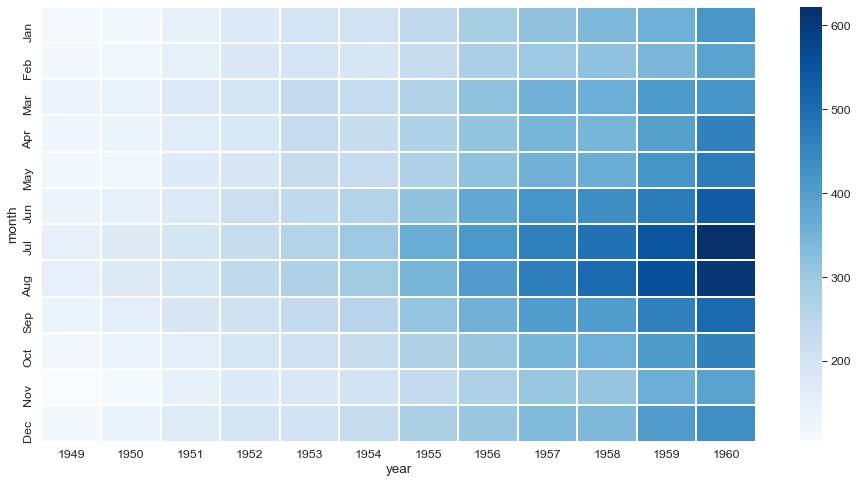

In [93]:
plt.figure(figsize=(16,8))
flights = sns.load_dataset('flights')
flights = flights.pivot_table(index='month', columns='year', values='passengers')
sns.heatmap(flights, cmap='Blues', linecolor='white', linewidth=1)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


<Figure size 1152x576 with 0 Axes>

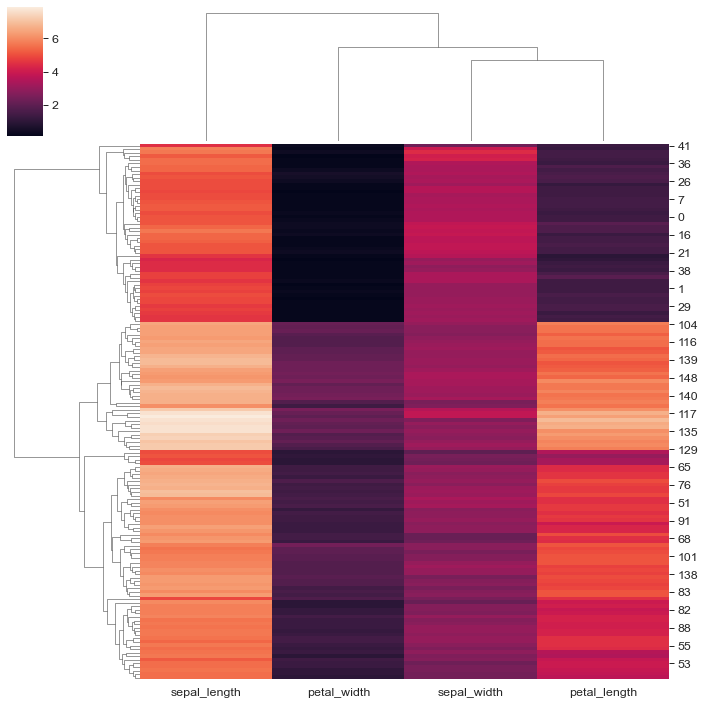

In [100]:
iris = sns.load_dataset('iris')
species = iris.pop('species')
print(species)

plt.figure(figsize=(16,8))
sns.clustermap(iris)

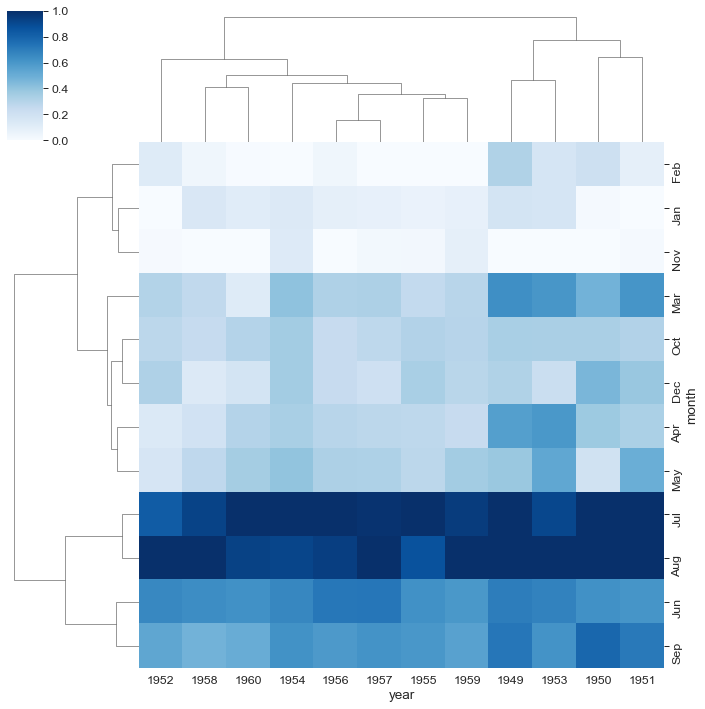

In [102]:
sns.clustermap(flights, cmap='Blues', standard_scale=1)

<Figure size 1152x1152 with 0 Axes>

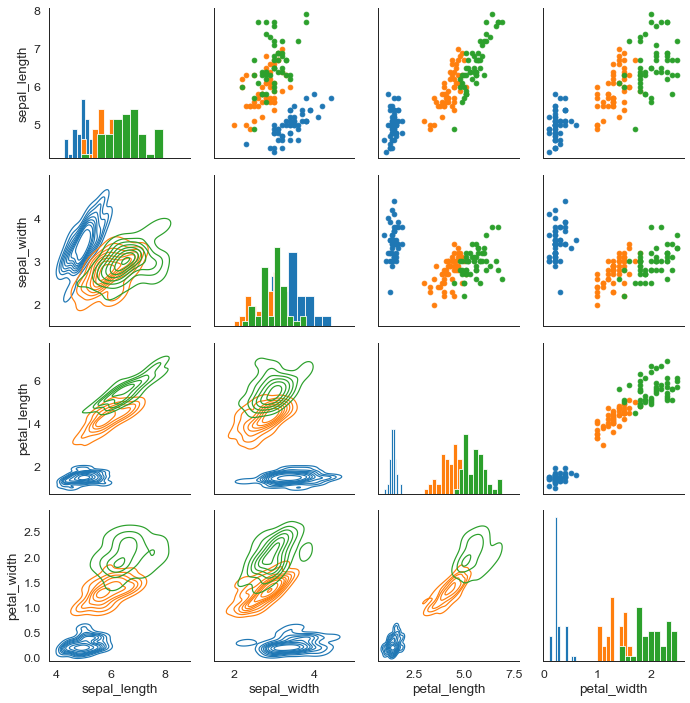

In [110]:
plt.figure(figsize=(16,16))

iris = sns.load_dataset('iris')
iris_g = sns.PairGrid(iris, hue='species')
# iris_g.map(plt.scatter)
iris_g.map_diag(plt.hist)
# iris_g.map_offdiag(plt.scatter)
iris_g.map_upper(plt.scatter)
iris_g.map_lower(sns.kdeplot)


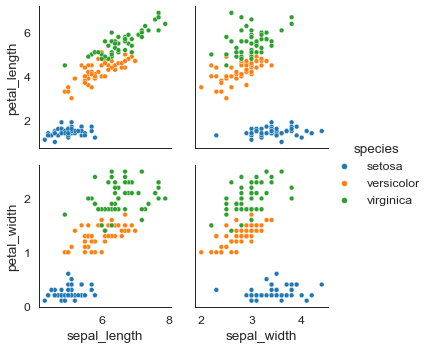

In [114]:
iris_g = sns.PairGrid(iris, hue='species', x_vars=['sepal_length', 'sepal_width'], y_vars=['petal_length', 'petal_width'])
iris_g.map(sns.scatterplot)
iris_g.add_legend()

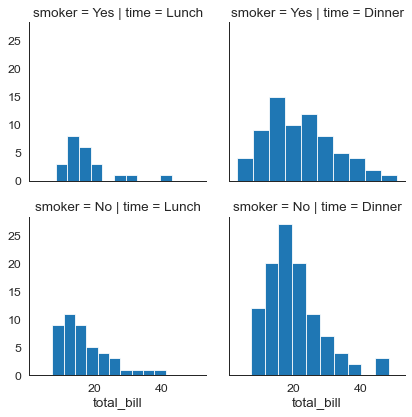

In [120]:
tips_fg = sns.FacetGrid(tips_df, col='time', row='smoker')
tips_fg.map(plt.hist, 'total_bill')

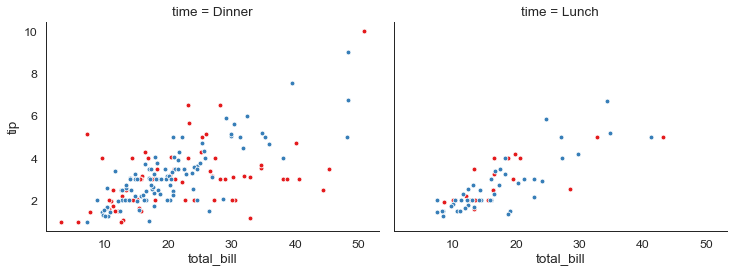

In [123]:
tips_fg = sns.FacetGrid(tips_df, col='time', hue='smoker', height=4, aspect=1.3, col_order=['Dinner', 'Lunch'], palette='Set1')
tips_fg.map(plt.scatter, 'total_bill', 'tip', edgecolor='w')

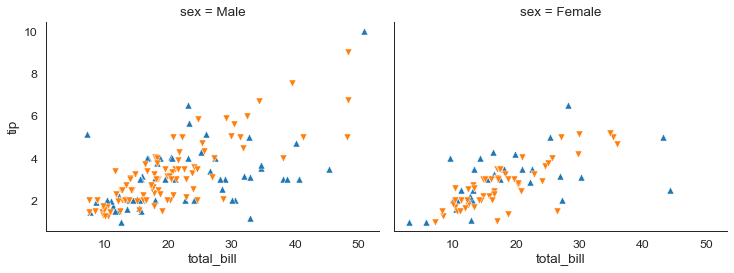

In [124]:
kws = dict(s=50, linewidth=.5, edgecolor='w')
tips_fg = sns.FacetGrid(tips_df, col='sex', hue='smoker', height=4, aspect=1.3, hue_order=['Yes', 'No'], hue_kws=dict(marker=['^', 'v']))
tips_fg.map(plt.scatter, 'total_bill', 'tip', **kws)

<Figure size 1152x576 with 0 Axes>

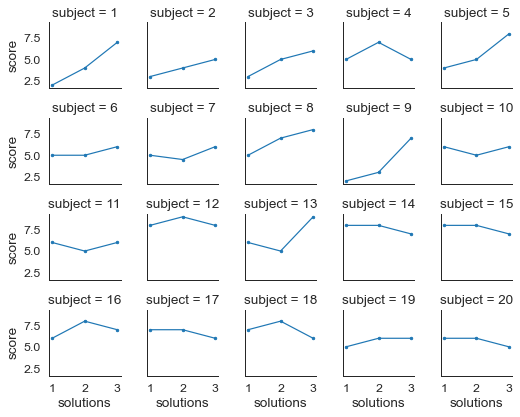

In [128]:
plt.figure(figsize=(16,8))
att_df = sns.load_dataset('attention')
att_fg = sns.FacetGrid(att_df, col='subject', col_wrap=5, height=1.5)
att_fg.map(plt.plot, 'solutions', 'score', marker='.')

## Regression Plots

In [139]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


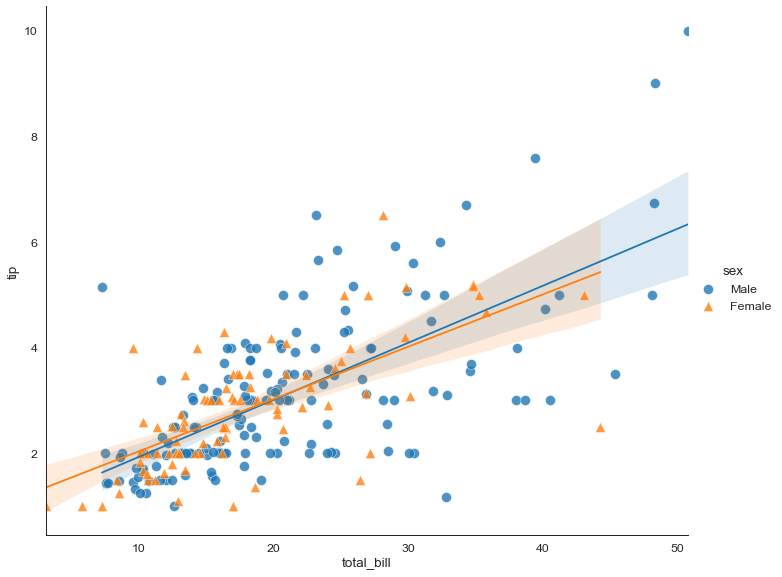

In [143]:
sns.set_context('paper', font_scale=1.4)
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips_df, markers=['o', '^'], 
           scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'}, height=8, aspect=1.2)

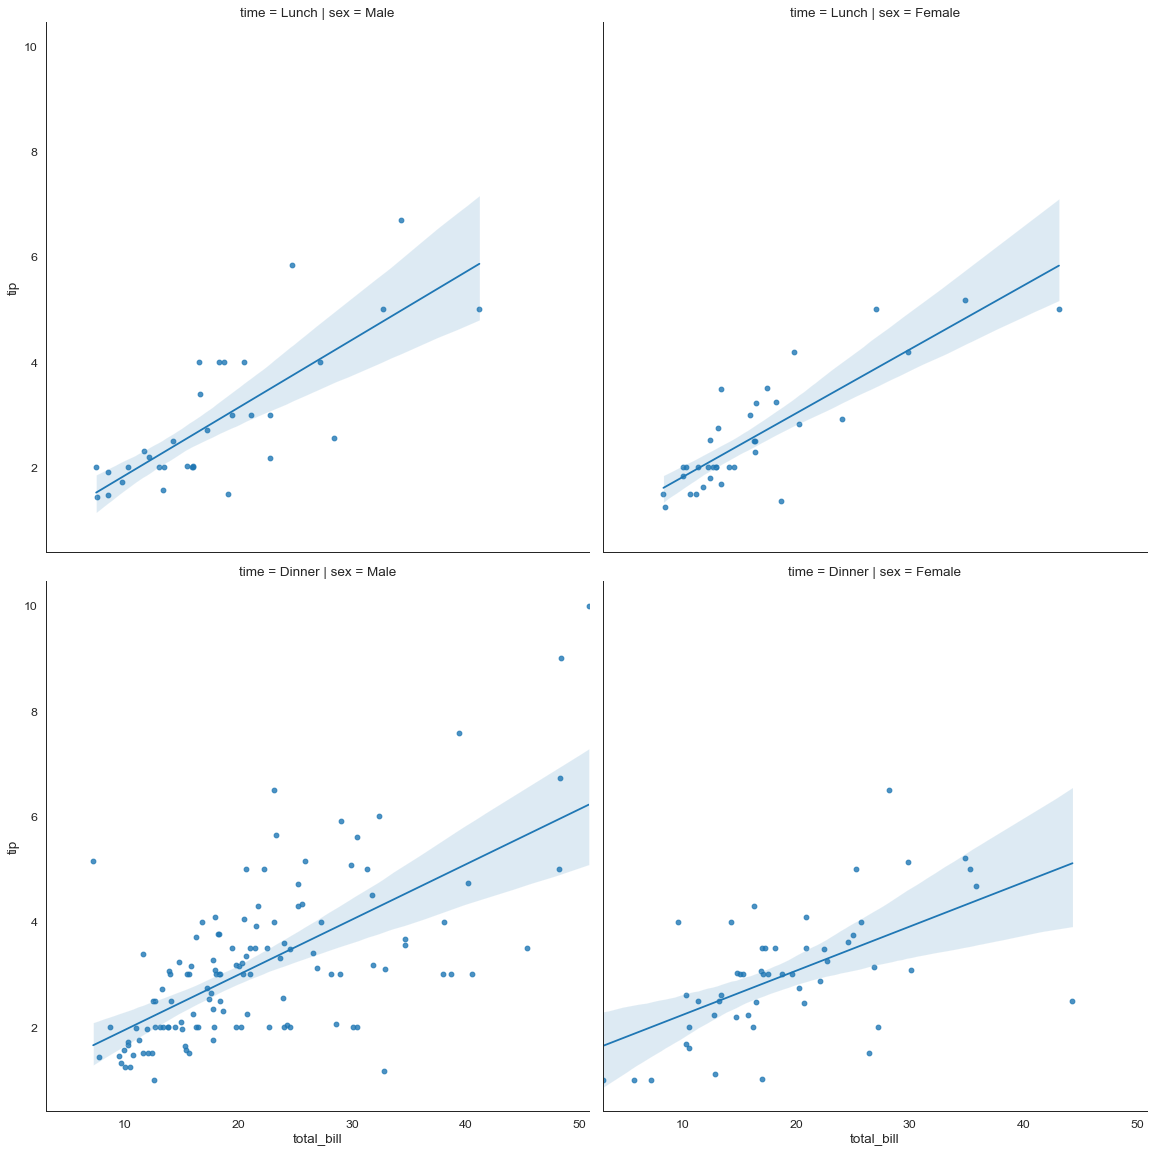

In [147]:
sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df, height=8, aspect=1)